In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import tensorflow as tf
import seaborn as sns

sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)
plt.rcParams['image.cmap'] = 'viridis'

%matplotlib inline

tfd = tfp.distributions
tfb = tfp.bijectors

# Build Model

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
])

# Inference

In [21]:
negloglik = lambda y, p_y: -p_y.log_prob(y)

In [24]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss=negloglik)

In [26]:
w0 = 0.125
b0 = 5.
x_range = [-20, 60]

def load_dataset(n=150, n_tst=150):
    np.random.seed(43)
    def s(x):
        g = (x - x_range[0]) / (x_range[1] - x_range[0])
        return 3 * (0.25 + g**2.)
    x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
    eps = np.random.randn(n) * s(x)
    y = (w0 * x * (1. + np.sin(x)) + b0) + eps
    x = x[..., np.newaxis]
    x_tst = np.linspace(*x_range, num=n_tst).astype(np.float32)
    x_tst = x_tst[..., np.newaxis]
    return y, x, x_tst

y, x, x_tst = load_dataset()

In [30]:
model.fit(x, y, epochs=500, verbose=True)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 6.1880
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 6.1891
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2485
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 6.1902
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2643
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 6.3136
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2897
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 6.4123
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 6.1971
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2209
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2056
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 6.3120
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 2ms/step - loss: 6.2362
Epoch 105/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2212
Epoch 106/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2729
Epoch 107/500
5/5 [==============================] - 0s 2ms/step - loss: 6.3395
Epoch 108/500
5/5 [==============================] - 0s 2ms/step - loss: 6.3440
Epoch 109/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2424
Epoch 110/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2316
Epoch 111/500
5/5 [==============================] - 0s 2ms/step - loss: 6.1542
Epoch 112/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2127
Epoch 113/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2158
Epoch 114/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2161
Epoch 115/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2953
Epoch 116/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 6.2065
Epoch 207/500
5/5 [==============================] - 0s 2ms/step - loss: 6.3326
Epoch 208/500
5/5 [==============================] - 0s 2ms/step - loss: 6.1233
Epoch 209/500
5/5 [==============================] - 0s 2ms/step - loss: 6.3444
Epoch 210/500
5/5 [==============================] - 0s 2ms/step - loss: 6.5188
Epoch 211/500
5/5 [==============================] - 0s 2ms/step - loss: 6.3765
Epoch 212/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2428
Epoch 213/500
5/5 [==============================] - 0s 2ms/step - loss: 6.3216
Epoch 214/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2251
Epoch 215/500
5/5 [==============================] - 0s 2ms/step - loss: 6.1893
Epoch 216/500
5/5 [==============================] - 0s 2ms/step - loss: 6.1967
Epoch 217/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2483
Epoch 218/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 6.4624
Epoch 309/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2500
Epoch 310/500
5/5 [==============================] - 0s 2ms/step - loss: 6.5056
Epoch 311/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2363
Epoch 312/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2576
Epoch 313/500
5/5 [==============================] - 0s 2ms/step - loss: 6.3915
Epoch 314/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2700
Epoch 315/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2828
Epoch 316/500
5/5 [==============================] - 0s 2ms/step - loss: 6.1813
Epoch 317/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2375
Epoch 318/500
5/5 [==============================] - 0s 2ms/step - loss: 6.1744
Epoch 319/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2363
Epoch 320/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 6.2382
Epoch 411/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2388
Epoch 412/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2079
Epoch 413/500
5/5 [==============================] - 0s 2ms/step - loss: 6.4038
Epoch 414/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2760
Epoch 415/500
5/5 [==============================] - 0s 2ms/step - loss: 6.3204
Epoch 416/500
5/5 [==============================] - 0s 2ms/step - loss: 6.7913
Epoch 417/500
5/5 [==============================] - 0s 2ms/step - loss: 6.5806
Epoch 418/500
5/5 [==============================] - 0s 2ms/step - loss: 6.2834
Epoch 419/500
5/5 [==============================] - 0s 2ms/step - loss: 6.4159
Epoch 420/500
5/5 [==============================] - 0s 2ms/step - loss: 6.4330
Epoch 421/500
5/5 [==============================] - 0s 2ms/step - loss: 6.4309
Epoch 422/500
5/5 [==============================] - 0

In [31]:
yhat = model(x_tst)

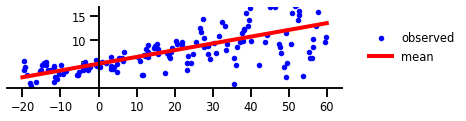

In [32]:
#@title Figure 1: No uncertainty.
w = np.squeeze(model.layers[-2].kernel.numpy())
b = np.squeeze(model.layers[-2].bias.numpy())

plt.figure(figsize=[6, 1.5])  # inches
#plt.figure(figsize=[8, 5])  # inches
plt.plot(x, y, 'b.', label='observed');
plt.plot(x_tst, yhat.mean(),'r', label='mean', linewidth=4);
plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('/tmp/fig1.png', bbox_inches='tight', dpi=300)

In [34]:
# Build model.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1 + 1),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.05 * t[...,1:]))),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss=negloglik)
model.fit(x, y, epochs=500, verbose=False)

# Make predictions.
yhat = model(x_tst)

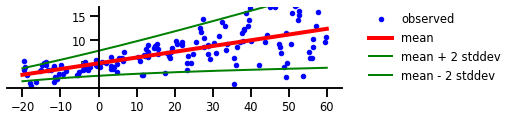

In [35]:
#@title Figure 2: Aleatoric Uncertainty
plt.figure(figsize=[6, 1.5])  # inches
plt.plot(x, y, 'b.', label='observed');

m = yhat.mean()
s = yhat.stddev()

plt.plot(x_tst, m, 'r', linewidth=4, label='mean');
plt.plot(x_tst, m + 2 * s, 'g', linewidth=2, label=r'mean + 2 stddev');
plt.plot(x_tst, m - 2 * s, 'g', linewidth=2, label=r'mean - 2 stddev');

plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('/tmp/fig2.png', bbox_inches='tight', dpi=300)